In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lls import LLS


In [2]:
def make_data(n):
    x=np.random.normal(4,1,n)
    y=x*2+5+np.random.random(n)
    return x,y
x_train,y_train=make_data(100)
lls=LLS(x_train,y_train)
lls.fit()

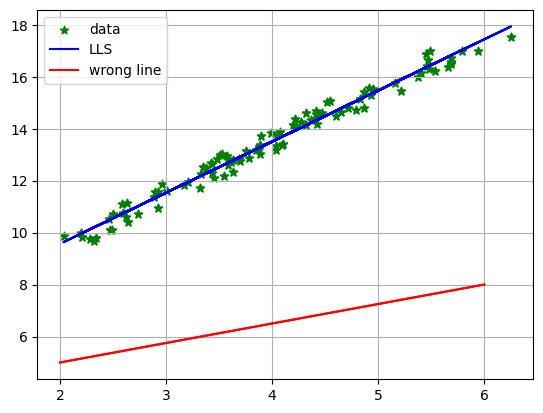

In [3]:
plt.scatter(x_train,y_train,marker="*",c="green")
plt.plot(x_train,lls.e_line,c="blue")
plt.plot((2,6),(5,8),c="red")
plt.grid()
#legend
plt.scatter(x_train,y_train,label="data",marker="*",c="green")
plt.plot(x_train,lls.e_line,c="blue",label="LLS")
plt.plot((2,6),(5,8),c="red",label="wrong line")
plt.legend()
plt.show()

# part_2 

Boston dataset from the scikit-learn library.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
data=pd.read_csv("boston_house_prices.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.corr().round(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


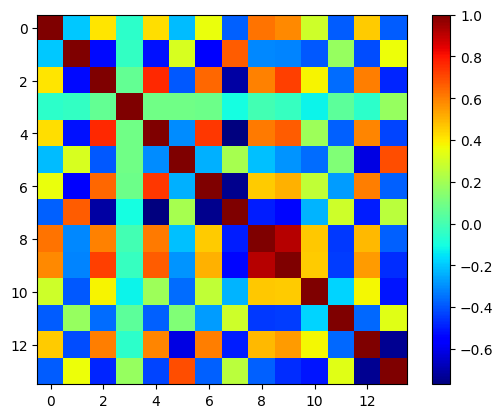

In [7]:
plt.imshow(data.corr(),cmap="jet")
plt.colorbar()
plt.show()

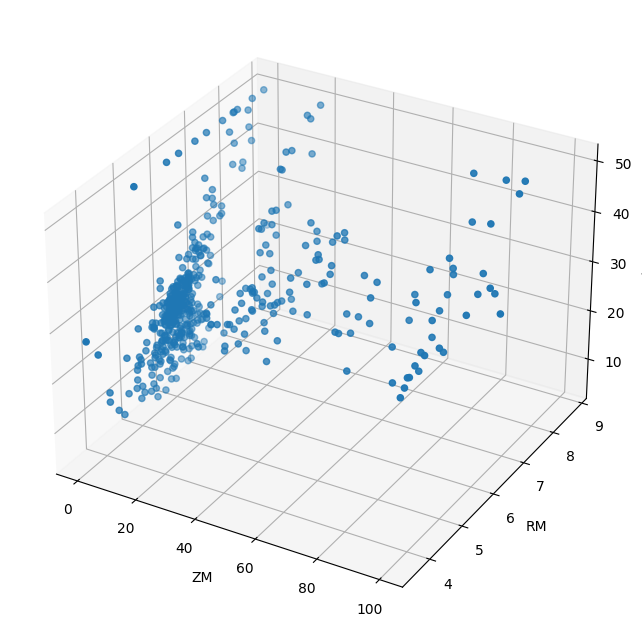

In [8]:

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
ax.scatter(data["ZN"],data["RM"],data["MEDV"])
ax.set_xlabel("ZM")
ax.set_ylabel("RM")
ax.set_zlabel("prices")
plt.show()

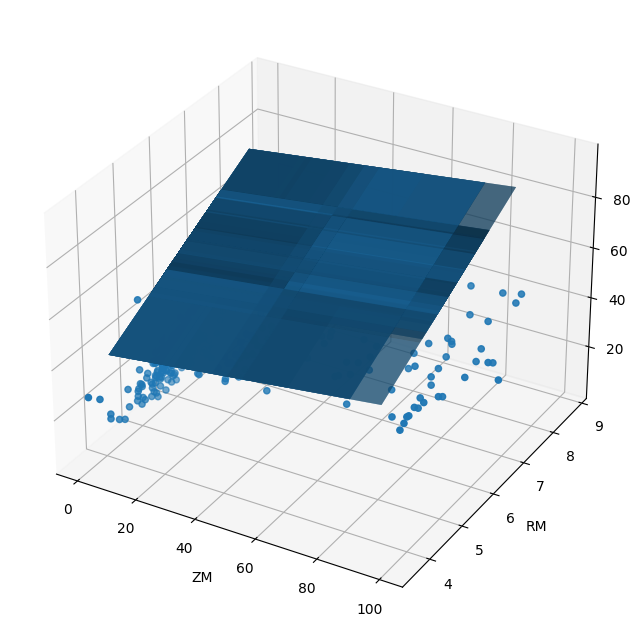

In [11]:
X,Y=np.meshgrid(data["ZN"].to_numpy(),data["RM"].to_numpy())
lls_x=LLS(data["ZN"].to_numpy(),data["MEDV"].to_numpy())
lls_y=LLS(data["RM"].to_numpy(),data["MEDV"].to_numpy())
lls_x.fit()
lls_y.fit()
slope_x=lls_x.slope
slope_y=lls_y.slope
Z=X*slope_x+Y*slope_y
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
ax.scatter(data["ZN"],data["RM"],data["MEDV"])
ax.set_xlabel("ZM")
ax.set_ylabel("RM")
ax.set_zlabel("prices")
ax.plot_surface(X,Y,Z,alpha=0.3)
plt.show()